In [4]:
import os

LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [2]:
import requests

requests.__version__

'2.22.0'

In [5]:
# LocationIQ로 “서울창업허브” 검색

# 원래 URL: https://us1.locationiq.com/v1/search.php?key=블라블라&q=서울창업허브&format=json
# URL을 물음표(?)를 중심으로 두 부분으로 나눕니다.

# 1. 물음표 앞부분.
url = 'https://us1.locationiq.com/v1/search.php'

# 2. 물음표 뒷부분.
params = {
    'key': LOCATIONIQ_TOKEN,
    'q': '서울창업허브',
    'format': 'json'
}

# API 호출
response = requests.get(url, params=params)

print(response)

<Response [200]>


In [7]:
# Response의 HTTP Status Code 확인

print(response.status_code)

200


In [9]:
# Response의 Text 확인

print(response.text)

[{"place_id":"206185511","licence":"https:\/\/locationiq.com\/attribution","osm_type":"way","osm_id":"608088218","boundingbox":["37.5463183","37.5468967","126.9492191","126.9501552"],"lat":"37.54662875","lon":"126.949684293519","display_name":"Seoul Startup Hub, Baekbeom-ro 31-gil, Ahyeon-dong, Mapo-gu, Seoul, 04140, South Korea","class":"office","type":"government","importance":0.001}]


JSON Beautifier
www.jsonformatter.io

In [11]:
# response의 text파일을 JSON으로 다룸
# 파싱을 따로 해주지 않아도 .json()으로 파싱을 할 수 있음

response.json() # 딕셔너리의 리스트

[{'place_id': '206185511',
  'licence': 'https://locationiq.com/attribution',
  'osm_type': 'way',
  'osm_id': '608088218',
  'boundingbox': ['37.5463183', '37.5468967', '126.9492191', '126.9501552'],
  'lat': '37.54662875',
  'lon': '126.949684293519',
  'display_name': 'Seoul Startup Hub, Baekbeom-ro 31-gil, Ahyeon-dong, Mapo-gu, Seoul, 04140, South Korea',
  'class': 'office',
  'type': 'government',
  'importance': 0.001}]

In [30]:
results = response.json()

In [14]:
len(results) # 길이가 1인 리스트

1

In [16]:
results[0]['lat'] # 리스트 첫번째 값의 'lat'출력

'37.54662875'

In [26]:
results[0]['lon']

'126.949684293519'

In [17]:
import pandas as pd

In [31]:
columns = results[0].keys()

In [32]:
columns

dict_keys(['place_id', 'licence', 'osm_type', 'osm_id', 'boundingbox', 'lat', 'lon', 'display_name', 'class', 'type', 'importance', 'icon'])

In [33]:
pd.DataFrame(results, columns = columns)
# pd.DataFrame(results, columns = results[0].keys())
# rows 대신 results 딕셔너리의 리스트를 적은 것

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
0,2686820,https://locationiq.com/attribution,node,357964440,"[37.5253113, 37.5254113, 126.8643395, 126.8644...",37.5253613,126.8643895,"Mok-dong Station, Mokdong-ro, Sinjeong 4(sa)-d...",highway,bus_stop,0.001,https://locationiq.org/static/images/mapicons/...
1,2746757,https://locationiq.com/attribution,node,357921478,"[37.5258547, 37.5259547, 126.8653726, 126.8654...",37.5259047,126.8654226,"Mok-dong Station, Omok-ro, Mok 1(il)-dong, Yan...",highway,bus_stop,0.001,https://locationiq.org/static/images/mapicons/...


In [35]:
# 완전 틀린 주소를 찾을 때

url = 'https://us1.locationiq.com/v1/search.php'
params = {
    'key': LOCATIONIQ_TOKEN,
    'q': '이 세계 어느 곳에도 없는 주소',
    'format': 'json'
}

response = requests.get(url, params=params)

print(response)

<Response [404]>


In [36]:
print(response.text)

{"error":"Unable to geocode"}


In [1]:

import os
from urllib.parse import unquote

API_KEY = unquote(os.environ['ANIMAL_API_KEY'])
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [2]:

import requests

requests.__version__

'2.22.0'

In [3]:

import pandas as pd

pd.__version__

'0.24.2'

In [4]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [5]:

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

In [6]:

!pip install folium

     |████████████████████████████████| 92kB 460kB/s eta 0:00:01


In [7]:

import folium

folium.__version__

'0.10.0'

In [8]:

from folium import Map
from folium.plugins import HeatMap

In [15]:
# 동물보호관리시스템 유기동물 조회 서비스 API

# 원래 URL: http://openapi.animal.go.kr/.../abandonmentPublic?serviceKey=어쩌고&bgnde=20190901&...

# 이렇게 긴 URL을 물음표(?)를 기준으로 두 부분으로 나눕니다.

# 물음표(?) 앞부분
url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

# 물음표(?) 뒷부분
payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 10_000,
}

# API 호출
response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [16]:
len(response.text)

7379559

In [17]:
import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)

root

<Element 'response' at 0x11e470228>

In [20]:
# 첫번째 내용을 얻고 다음으로 넘어갑니다.

item = next(root.iter('item'))

# Item에 어떤 내용이 있는지 확인합니다.

list(item)

# item만 입력할 시에는 item의 값들은 출력안하고 정보?만 출력됨

[<Element 'age' at 0x12777d368>,
 <Element 'careAddr' at 0x12777d3b8>,
 <Element 'careNm' at 0x12777d408>,
 <Element 'careTel' at 0x12777d458>,
 <Element 'chargeNm' at 0x12777d4a8>,
 <Element 'colorCd' at 0x12777d4f8>,
 <Element 'desertionNo' at 0x12777d548>,
 <Element 'filename' at 0x12777d598>,
 <Element 'happenDt' at 0x12777d5e8>,
 <Element 'happenPlace' at 0x12777d638>,
 <Element 'kindCd' at 0x12777d688>,
 <Element 'neuterYn' at 0x12777d6d8>,
 <Element 'noticeEdt' at 0x12777d728>,
 <Element 'noticeNo' at 0x12777d778>,
 <Element 'noticeSdt' at 0x12777d7c8>,
 <Element 'officetel' at 0x12777d818>,
 <Element 'orgNm' at 0x12777d868>,
 <Element 'popfile' at 0x12777d8b8>,
 <Element 'processState' at 0x12777d908>,
 <Element 'sexCd' at 0x12777d958>,
 <Element 'specialMark' at 0x12777d9a8>,
 <Element 'weight' at 0x12777d9f8>]

In [24]:
child = item.find('kindCd')

print(child)

<Element 'kindCd' at 0x12777d688>


In [23]:
print(child.text)

[개] 푸들


In [25]:
print(child.tag)

kindCd


In [26]:
for child in item:
    print(child.tag, child.text)

age 2016(년생)
careAddr 경상남도 고성군 고성읍 송학리 260-54
careNm 백호종합동물병원
careTel 010-3551-8261
chargeNm 이주영
colorCd 흰색
desertionNo 448542201900419
filename http://www.animal.go.kr/files/shelter/2019/09/201909241409108_s.jpg
happenDt 20190924
happenPlace 경남 고성군 영오면 양산4길 12
kindCd [개] 푸들
neuterYn N
noticeEdt 20191008
noticeNo 경남-고성-2019-00332
noticeSdt 20190924
officetel 055-670-4314
orgNm 경상남도 고성군
popfile http://www.animal.go.kr/files/shelter/2019/09/201909241409108.jpg
processState 보호중
sexCd M
specialMark 피모 불량
weight 5(Kg)


In [27]:
item = next(root.iter('item'))

columns = []

for child in list(item) :
    columns.append(child.tag)
    
columns

['age',
 'careAddr',
 'careNm',
 'careTel',
 'chargeNm',
 'colorCd',
 'desertionNo',
 'filename',
 'happenDt',
 'happenPlace',
 'kindCd',
 'neuterYn',
 'noticeEdt',
 'noticeNo',
 'noticeSdt',
 'officetel',
 'orgNm',
 'popfile',
 'processState',
 'sexCd',
 'specialMark',
 'weight']

In [28]:
# XML 데이터를 Pandas DataFrame으로 변환

# dictionary의 list를 준비합니다. 처음엔 0개죠.
rows = []

# item을 하나씩 rows에 넣을 겁니다.
for item in root.iter('item'):
    # 일단 row를 준비합니다. 단수형과 복수형을 구분해서 쓰니까 주의하세요.
    row = {}
    # item의 자녀를 하나씩 row에 넣을 겁니다.
    # 이런 코드가 나오면 앞에 나온 for는 잊어버리세요.
    # 지금부터 나오는 것에 집중하세요.
    for child in list(item):
        # dictionary는 key와 value를 함께 써서 추가 또는 변경합니다.
        # tag와 text가 헷갈리면 바로 위에 나온 ElementTree를 다시 확인하세요.
        # tag와 text는 보편적인 표현이 아닙니다.
        # A라는 폴더의 README.md 파일과 B라는 폴더의 README.md 파일은 이름이 같지만 전혀 다릅니다.
        # 어떤 게 들어있는지는 직접 열어보기 전에는 알 수 없습니다.
        # “모르는 것 발견 = 지금 당장 확인”을 습관으로 만드세요. 손은 눈보다 빠릅니다.
        row[child.tag] = child.text
    # 이렇게 블록이 끝나면 방금 있던 for를 잊으세요.
    # 우리가 얻은 건 item의 자녀 내용이 들어간 row죠.
    # 이제 이걸 rows(단수형과 복수형에 주의하세요)에 넣어줍니다.
    # list는 append를 썼죠?
    rows.append(row)

# dictionary의 list는 Pandas의 DataFrame으로 쉽게 변경 가능합니다.

df = pd.DataFrame(rows, columns=columns)


In [29]:
rows

[{'age': '2016(년생)',
  'careAddr': '경상남도 고성군 고성읍 송학리 260-54',
  'careNm': '백호종합동물병원',
  'careTel': '010-3551-8261',
  'chargeNm': '이주영',
  'colorCd': '흰색',
  'desertionNo': '448542201900419',
  'filename': 'http://www.animal.go.kr/files/shelter/2019/09/201909241409108_s.jpg',
  'happenDt': '20190924',
  'happenPlace': '경남 고성군 영오면 양산4길 12',
  'kindCd': '[개] 푸들',
  'neuterYn': 'N',
  'noticeEdt': '20191008',
  'noticeNo': '경남-고성-2019-00332',
  'noticeSdt': '20190924',
  'officetel': '055-670-4314',
  'orgNm': '경상남도 고성군',
  'popfile': 'http://www.animal.go.kr/files/shelter/2019/09/201909241409108.jpg',
  'processState': '보호중',
  'sexCd': 'M',
  'specialMark': '피모 불량',
  'weight': '5(Kg)'},
 {'age': '2017(년생)',
  'careAddr': '경상남도 고성군 고성읍 송학리 260-54',
  'careNm': '백호종합동물병원',
  'careTel': '010-3551-8261',
  'chargeNm': '이주영',
  'colorCd': '흰갈색',
  'desertionNo': '448542201900416',
  'filename': 'http://www.animal.go.kr/files/shelter/2019/09/201909240909779_s.jpg',
  'happenDt': '20190924',


In [30]:
df

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰색,448542201900419,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 영오면 양산4길 12,...,20191008,경남-고성-2019-00332,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,피모 불량,5(Kg)
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,흰갈색,448542201900416,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 하이면 월흥7길 11-3,...,20191008,경남-고성-2019-00331,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,6(Kg)
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,010-3551-8261,이주영,고동색,448542201900415,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 고성군 고성읍 수남2길 39,...,20191008,경남-고성-2019-00330,20190924,055-670-4314,경상남도 고성군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,특이사항 없음,4(Kg)
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,흰색,448539201900058,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00061,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg)
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,"검정,흰색갈색모색",448539201900057,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 용덕면 가락마을부근,...,20191004,경남-의령-2019-00060,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,암컷강아지 두마리,4(Kg)
5,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,갈색,448539201900056,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 대의면 죽전마을 부근,...,20191004,경남-의령-2019-00059,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,경계 심함 목줄없음,7(Kg)
6,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,갈색,448539201900055,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 양촌마을회관부근,...,20191004,경남-의령-2019-00058,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람 잘따름 관리상태 양호,6(Kg)
7,2016(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,검 흰,448539201900054,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 부림면 손오리 산정현교회 부근,...,20191004,경남-의령-2019-00057,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,검은색모색 사람 안따름,6(Kg)
8,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,흰,448539201900053,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 칠곡로 71-6,...,20191004,경남-의령-2019-00056,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람 잘따름 목줄없음,11(Kg)
9,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,055-570-4150,의령군,검갈,448539201900052,http://www.animal.go.kr/files/shelter/2019/09/...,20190924,경남 의령군 칠곡면 칠곡로 71-6,...,20191004,경남-의령-2019-00055,20190924,055-570-4153,경상남도 의령군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,사람을 잘따름,11(Kg)


In [31]:
df.columns

Index(['age', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'orgNm',
       'popfile', 'processState', 'sexCd', 'specialMark', 'weight'],
      dtype='object')

In [32]:
df.shape

(9417, 22)

In [33]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,207
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [34]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터 만들기

simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename',
    'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

# 정리된 데이터 확인

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
0,2016(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰색,20190924,경남 고성군 영오면 양산4길 12,[개] 푸들,N,경상남도 고성군,보호중,M,피모 불량,5(Kg)
1,2017(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,흰갈색,20190924,경남 고성군 하이면 월흥7길 11-3,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,6(Kg)
2,2019(년생),경상남도 고성군 고성읍 송학리 260-54,백호종합동물병원,이주영,고동색,20190924,경남 고성군 고성읍 수남2길 39,[개] 믹스견,N,경상남도 고성군,보호중,M,특이사항 없음,4(Kg)
3,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,흰색,20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,"사람 잘따름,많이 작은 사이즈",4(Kg)
4,2019(년생),경상남도 의령군 의령읍 의병로9동길 30 (의령읍) 의령군농업기술센터,전조동,의령군,"검정,흰색갈색모색",20190924,경남 의령군 용덕면 가락마을부근,[개] 믹스견,U,경상남도 의령군,보호중,F,암컷강아지 두마리,4(Kg)


In [35]:
# 갯수 세기

data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),4717
2018(년생),1177
2017(년생),1159
2016(년생),879
2014(년생),403
2015(년생),380
2013(년생),224
2009(년생),137
2012(년생),122
2011(년생),110


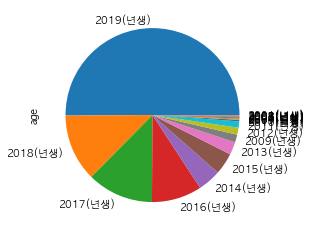

In [36]:
# 파이 그래프

data.plot.pie()

plt.show()

In [37]:

# 갯수 세기

data = simple_df['sexCd'].value_counts()

pd.DataFrame(data)

,sexCd
M,4410
F,4170
Q,837


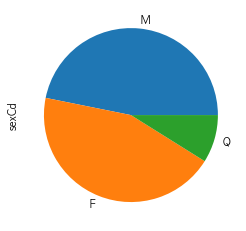

In [38]:
# 파이 그래프

data.plot.pie()

plt.show()

In [39]:
# 갯수 세기

data = simple_df['neuterYn'].value_counts()

pd.DataFrame(data)

,neuterYn
N,5957
U,3052
Y,408


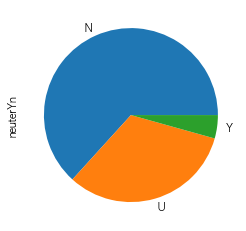

In [40]:
# 파이 그래프

data.plot.pie()

plt.show()